# Import & Install Required Packages

In [2]:
pip install tensorflow opencv-python matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\user\anaconda3\envs\digit-recognition\lib\site-packages (2.10.0)



In [3]:
import os
import itertools
import time
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical
from plotly import tools, subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
! pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

In [7]:
# Organizing images based on class

# Define the dataset path
dataset_path = "E:/Lian/S2/Datasets/kannada_characters/img"

# Create a destination folder to organize images
organized_dataset_directory = "E:/Lian/S2/Datasets/kannada_characters/organized"
if not os.path.exists(organized_dataset_directory):
    os.makedirs(organized_dataset_directory)

# Iterate over the files in the dataset
for file_name in os.listdir(dataset_path):
    if file_name.endswith(".png"):
        # Extract the class/label from the file name (e.g., img001)
        label = file_name.split('-')[0]
        
        # Create a subfolder for each label if it doesn't exist
        label_dir = os.path.join(organized_dataset_directory, label)
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        # Move the file into the appropriate label directory
        source_file = os.path.join(dataset_path, file_name)
        destination_file = os.path.join(label_dir, file_name)
        shutil.move(source_file, destination_file)

print("Dataset organized successfully!")

Dataset organized successfully!


In [8]:
num_classes = len([name for name in os.listdir(organized_dataset_directory) if os.path.isdir(os.path.join(organized_dataset_directory, name))])

print(f"Number of classes: {num_classes}")

Number of classes: 657


In [11]:
# Load images using image_dataset_from_directory
dataset_path = "E:/Lian/S2/Datasets/kannada_characters/organized"

# Parameters
image_size = (64, 64)  # Image dimensions
batch_size = 32  # Batch size

# Create train and test datasets
dataset = image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    label_mode='int',
    validation_split=0.1,  # Split data into 90% training, 10% validation
    subset='both',
    seed=42
)

# Unpack train and validation datasets
train_dataset, test_dataset = dataset

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 16425 files belonging to 657 classes.
Using 14783 files for training.
Using 1642 files for validation.


In [12]:
dataset

[<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>]

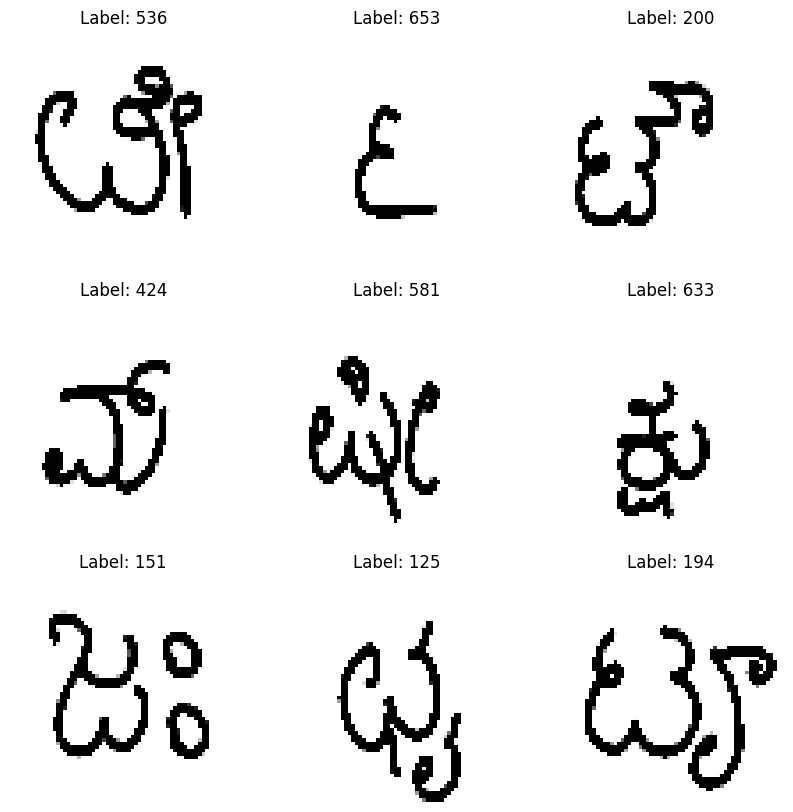

In [13]:
# Visualize some images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
plt.show()

In [ ]:
# # Define your model
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(64, 64, 1)),
#     tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((8, 8), padding='same'),
#     tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((4, 4), padding='same'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# model.summary()

In [14]:
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(64, 64, 1)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='softmax')  # Change to softmax for multiclass classification
# ])

In [ ]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
462/462 [==============================] - 116s 247ms/step - loss: 6.4907 - accuracy: 9.4703e-04 - val_loss: 6.4916 - val_accuracy: 0.0000e+00
Epoch 2/10
442/462 [===========================>..] - ETA: 3s - loss: 6.4892 - accuracy: 0.0011

In [15]:
# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

# # Evaluate the model
# loss, accuracy = model.evaluate(test_dataset)
# print(f"Test accuracy: {accuracy}")

Epoch 1/10
462/462 [==============================] - ETA: 0s - loss: 6.4326 - accuracy: 0.0019

KeyboardInterrupt: 

# Result

# Visualization

In [ ]:
def plot_images_sample(dataset, num_samples=25):
    plt.figure(figsize=(10, 10))

    # Get a batch from the dataset
    for images, labels in dataset.take(1):  # Take one batch
        rand_indices = np.random.randint(images.shape[0], size=num_samples)  # Random indices from the batch

        for i in range(num_samples):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)

            index = rand_indices[i]
            plt.imshow(np.squeeze(images[index]), cmap=plt.cm.binary)
            plt.xlabel(labels[index].numpy())  # Convert to numpy for display

    plt.show()

# Usage
plot_images_sample(train_dataset) 

In [ ]:
# Draw plot for CNN training

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0.5, 1])

plt.legend(loc='lower right')

plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Prediction

In [ ]:
def plot_images_prediction(dataset, predictions, num_samples=25):
    plt.figure(figsize=(10, 10))

    # Get a batch from the dataset
    for images, labels in dataset.take(1):  # Take one batch
        rand_indices = np.random.randint(images.shape[0], size=num_samples)  # Random indices from the batch

        for i in range(num_samples):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)

            index = rand_indices[i]
            plt.imshow(np.squeeze(images[index]), cmap=plt.cm.binary)
            plt.xlabel(f"Pred: {predictions[index].item()} -> True: {labels[index].numpy()}")  # Show both predicted and true labels

    plt.show()

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)
plot_images_prediction(test_dataset, predictions)

# Save the model to a file

In [ ]:
# model_save_path = 'cnn_model.h5'

model_save_path = 'kannada_model_1.keras'

model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size: {model_size / 1024:.2f} KB")

# Define the model and apply the sparsity API

In [ ]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
}

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]

pruned_model = prune_low_magnitude(model, **pruning_params)

opt = keras.optimizers.Adam()

pruned_model.compile(
  loss=keras.losses.SparseCategoricalCrossentropy(),
  optimizer=opt,
  metrics=['accuracy']
)

pruned_model.summary()

# Pruning Process

In [ ]:
pruned_model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    callbacks=callbacks
)

In [ ]:
model_save_path = 'kannada_model_pruned_1.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'kannada_model_pruned_1.tflite'
with open(model_save_path, 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

# Post Training Quantization

In [ ]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
quantized_model = 'quantized_pruned_model_kannada_1.tflite'
with open(quantized_model, 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path=quantized_model)
interpreter.allocate_tensors()

In [ ]:
final_model.compile(
  loss=keras.losses.SparseCategoricalCrossentropy(),
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
final_model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    callbacks=callbacks
)

In [ ]:
model_size = os.path.getsize(quantized_model)

print(f"Model size after quantization: {model_size / 1024:.2f} KB")

# Optimized Model with Knowledge Distillation

In [ ]:
# Custom loss function for Knowledge Distillation
def distillation_loss(y_true, y_pred, teacher_logits, temperature=5.0, alpha=0.5):
    student_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    distillation_loss = tf.keras.losses.KLDivergence()(
        tf.nn.softmax(teacher_logits / temperature),
        tf.nn.softmax(y_pred / temperature)
    )
    return alpha * student_loss + (1 - alpha) * distillation_loss

# Train student model with teacher model's logits
def train_student_model(student_model, teacher_model, X_train, y_train):
    teacher_logits = teacher_model.predict(X_train)

    # Custom training loop
    start_kd_time = time.time()    
    for epoch in range(10):
        print(f"Epoch {epoch + 1}/10")
        epoch_loss = 0
        correct_predictions = 0
        total_predictions = 0
        
        for i in range(0, len(X_train), 32):
            X_batch = X_train[i:i+32]
            y_batch = y_train[i:i+32]
            with tf.GradientTape() as tape:
                y_pred = student_model(X_batch, training=True)
                loss = distillation_loss(y_batch, y_pred, teacher_logits[i:i+32])
            grads = tape.gradient(loss, student_model.trainable_variables)
            student_model.optimizer.apply_gradients(zip(grads, student_model.trainable_variables))

            # Track loss and accuracy
            epoch_loss += loss.numpy().sum() * len(y_batch)  # Ensure loss is a scalar
            correct_predictions += np.sum(np.argmax(y_pred.numpy(), axis=-1) == np.argmax(y_batch, axis=-1))
            total_predictions += len(y_batch)

        average_loss = epoch_loss / total_predictions
        accuracy = correct_predictions / total_predictions
        print(f"Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

    end_time = time.time()
    total_time = end_time - start_kd_time 
    print(f"Total time: {total_time:.2f} seconds")

# Train the student model
student_model = model
train_student_model(model, final_model, X_train, Y_train)

In [ ]:
# Evaluate student model

student_loss, student_accuracy = student_model.evaluate(X_test, Y_test)
print(f"Student Model Accuracy: {student_accuracy}, Loss: {student_loss}")

In [ ]:
model_save_path = 'student_model_1_kannada.keras'
student_model.save(model_save_path)


# Get the size of the model in bytes

model_size = os.path.getsize(model_save_path)

print(f"Model size: {model_size / 1024:.2f} KB")